In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install yfinance
!pip install scikit-learn
!pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.4 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Price')

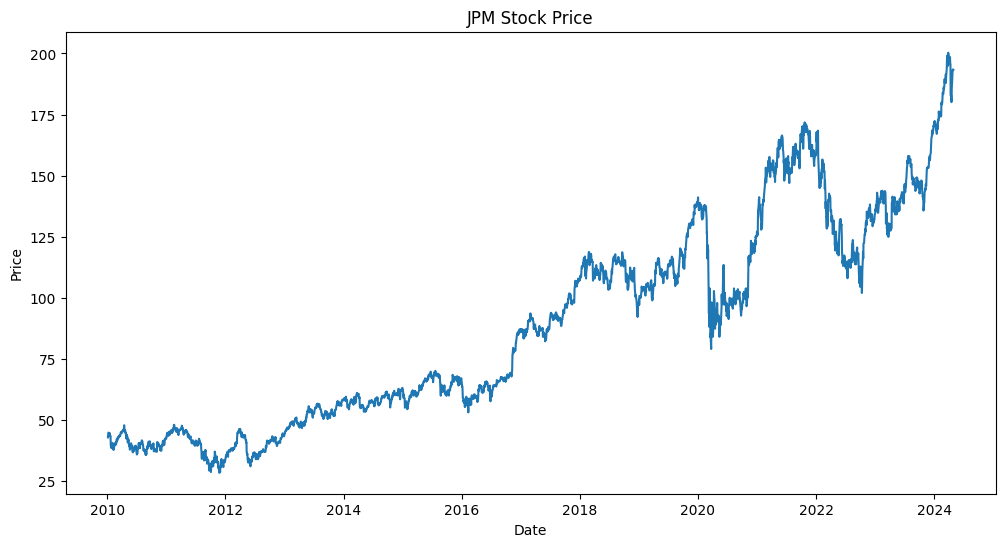

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Download JPM stock price data
jpm = yf.download('jpm', start='2010-01-01', end='2024-04-30')

# Plot JPM stock price
plt.figure(figsize=(12, 6))
plt.plot(jpm['Close'])
plt.title('JPM Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

In [3]:
# Split data into training and testing sets
train_size = int(len(jpm) * 0.7)
train_data = jpm['Close'][:train_size]
test_data = jpm['Close'][train_size:]

In [4]:
#Normalize the data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.values.reshape(-1, 1))

In [5]:
# Create a GP model
kernel = RBF(length_scale = 1)
model = GaussianProcessRegressor(kernel=kernel)
model.fit(train_data_normalized, train_data_normalized)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

In [6]:
# Make predictions on the testing set
test_data_normalized = scaler.transform(test_data.values.reshape(-1, 1))
predictions = model.predict(test_data_normalized)

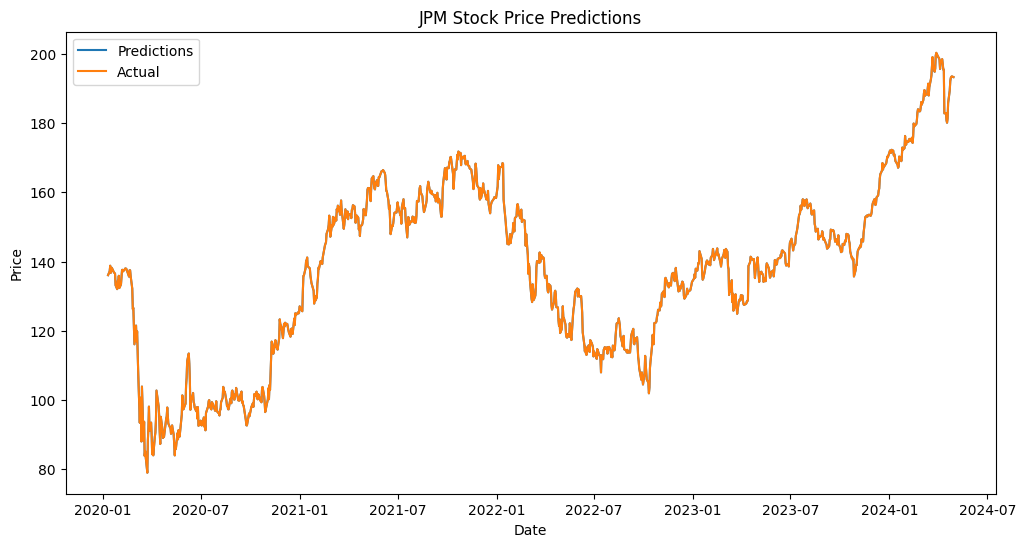

In [7]:
# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, scaler.inverse_transform(predictions.reshape(-1, 1)), label='Predictions')
plt.plot(test_data.index, test_data.values, label='Actual')
plt.title('JPM Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

(120.0, 180.0)

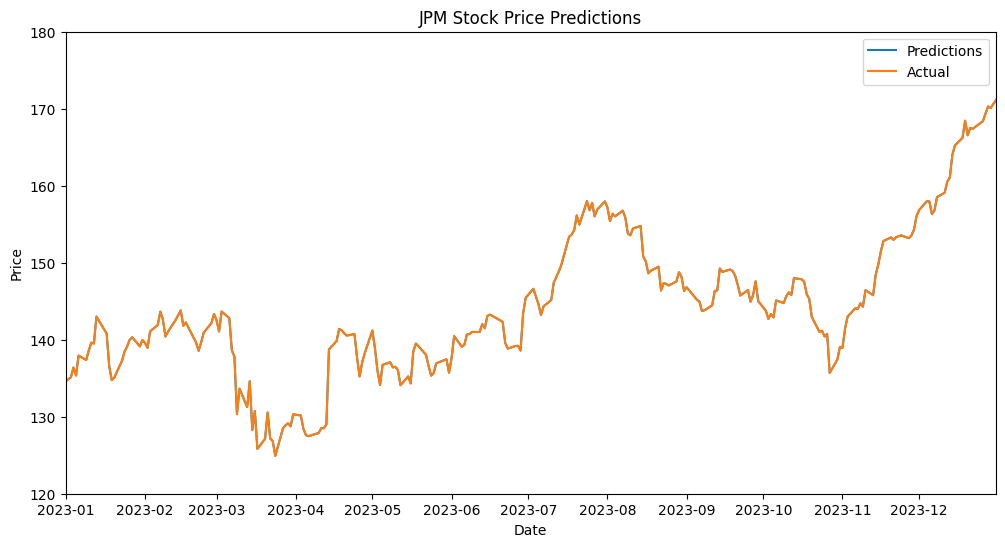

In [8]:
import matplotlib.dates as mdates
import pandas as pd


# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, scaler.inverse_transform(predictions.reshape(-1, 1)), label='Predictions')
plt.plot(test_data.index, test_data.values, label='Actual')
plt.title('JPM Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xlim([mdates.date2num(pd.Timestamp('2023-01-01')), mdates.date2num(pd.Timestamp('2023-12-31'))])  # Zoom into 2023
plt.ylim(120, 180)  # Zoom into price range from $100 to $150


In [9]:
# Calculate evaluation metrics
mse = mean_squared_error(test_data, scaler.inverse_transform(predictions.reshape(-1, 1)))
mape = mean_absolute_percentage_error(test_data, scaler.inverse_transform(predictions.reshape(-1, 1)))

In [10]:
mse

4.924388089855529e-05

In [11]:
mape

1.205137332798827e-05

In [12]:
from sklearn.gaussian_process.kernels import Matern

# Create a GP model with the Matern kernel
kernel = Matern(nu=1.5)
model = GaussianProcessRegressor(kernel=kernel)
model.fit(train_data_normalized, train_data_normalized)

GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5))

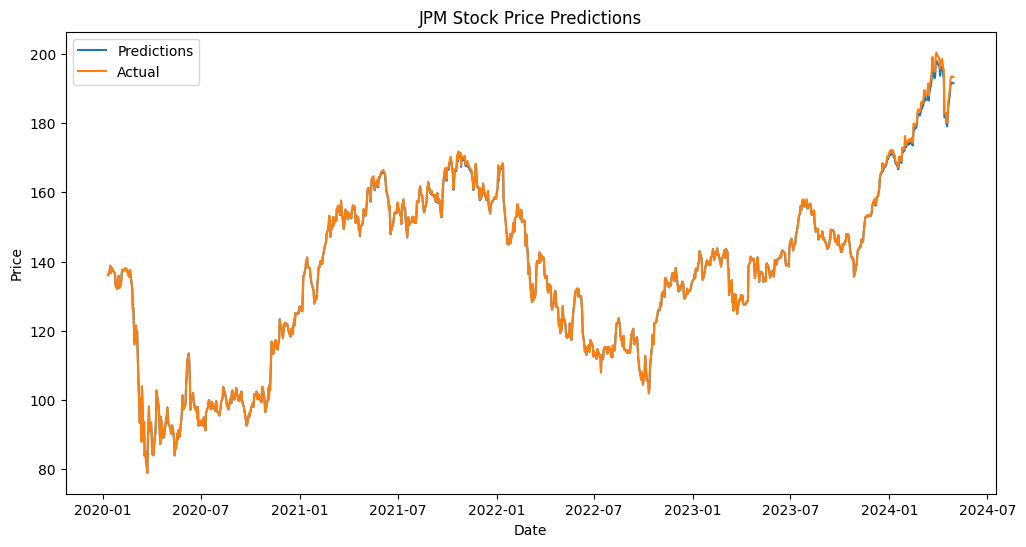

In [13]:
# Make predictions on the testing set
test_data_normalized = scaler.transform(test_data.values.reshape(-1, 1))
predictions = model.predict(test_data_normalized)

# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, scaler.inverse_transform(predictions.reshape(-1, 1)), label='Predictions')
plt.plot(test_data.index, test_data.values, label='Actual')
plt.title('JPM Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
# -*- coding: utf-8 -*-
"""GaussianProcesses.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1OHeQy4rdAJE2ZZ-7vsURh6JtZa8PBtiY
"""

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install yfinance
!pip install scikit-learn
!pip install GPy


[*********************100%%**********************]  1 of 1 completed


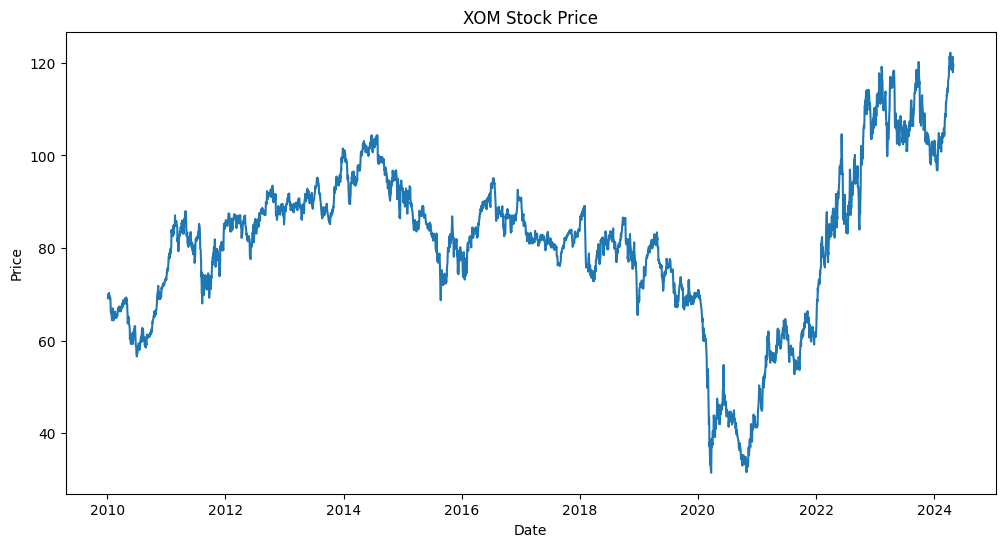

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


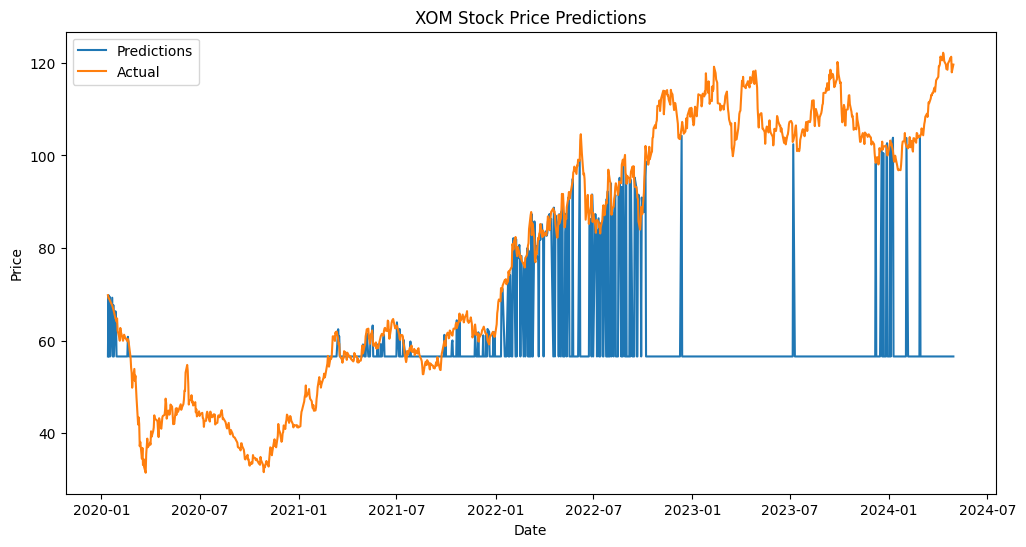

MSE: 1111.5423580269278
MAPE: 0.29523833137503674


In [54]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Download XOM stock price data
xom = yf.download('XOM', start='2010-01-01', end='2024-04-30')

# Plot XOM stock price
plt.figure(figsize=(12, 6))
plt.plot(xom['Close'])
plt.title('XOM Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Split data into training and testing sets
train_size = int(len(xom) * 0.7)
train_data = xom['Close'][:train_size]
test_data = xom['Close'][train_size:]

# Normalize the data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.values.reshape(-1, 1))

# Create X and y for training
X_train = train_data_normalized[:-1]
y_train = train_data_normalized[1:]

# Ensure the data is 2D
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Create a GP model
kernel = RBF(length_scale=1)
model = GaussianProcessRegressor(kernel=kernel)
model.fit(X_train, y_train)

# Make predictions on the testing set
test_data_normalized = scaler.transform(test_data.values.reshape(-1, 1))

# For predictions, use previous day's price as input
X_test = test_data_normalized[:-1]
y_test = test_data_normalized[1:]

# Ensure the test data is 2D
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

predictions = model.predict(X_test).reshape(-1, 1)

# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[1:], scaler.inverse_transform(predictions), label='Predictions')
plt.plot(test_data.index[1:], scaler.inverse_transform(y_test), label='Actual')
plt.title('XOM Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), scaler.inverse_transform(predictions))

print("MSE:", mse)
print("MAPE:", mape)




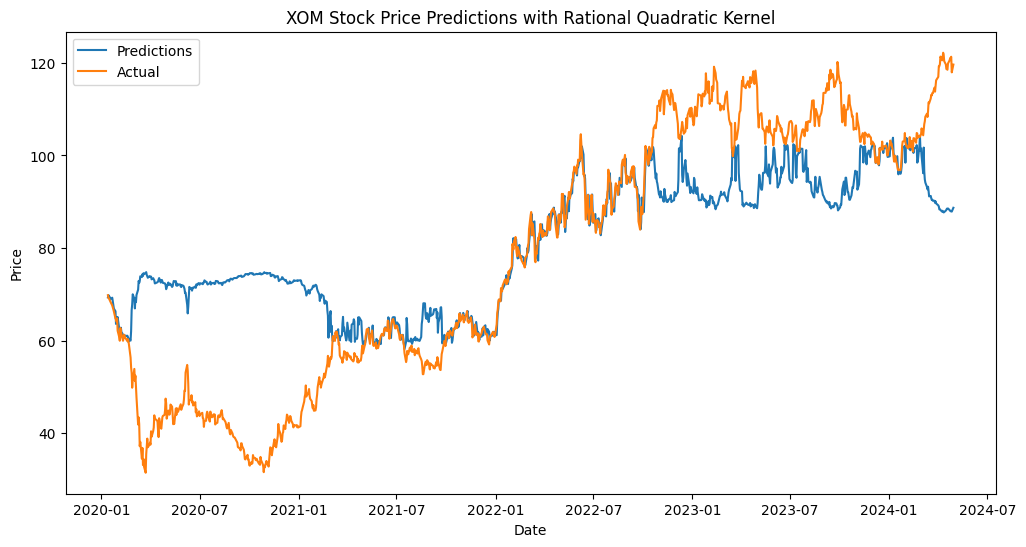

MSE with Rational Quadratic Kernel: 336.4339423709849
MAPE with Rational Quadratic Kernel: 0.23530094878831015


In [53]:
from sklearn.gaussian_process.kernels import RationalQuadratic

# Create a GP model with the Rational Quadratic kernel
kernel = RationalQuadratic(length_scale=1.0, alpha=0.1)
model = GaussianProcessRegressor(kernel=kernel)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test).reshape(-1, 1)

# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[1:], scaler.inverse_transform(predictions), label='Predictions')
plt.plot(test_data.index[1:], scaler.inverse_transform(y_test), label='Actual')
plt.title('XOM Stock Price Predictions with Rational Quadratic Kernel')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), scaler.inverse_transform(predictions))

print("MSE with Rational Quadratic Kernel:", mse)
print("MAPE with Rational Quadratic Kernel:", mape)


[*********************100%%**********************]  1 of 1 completed


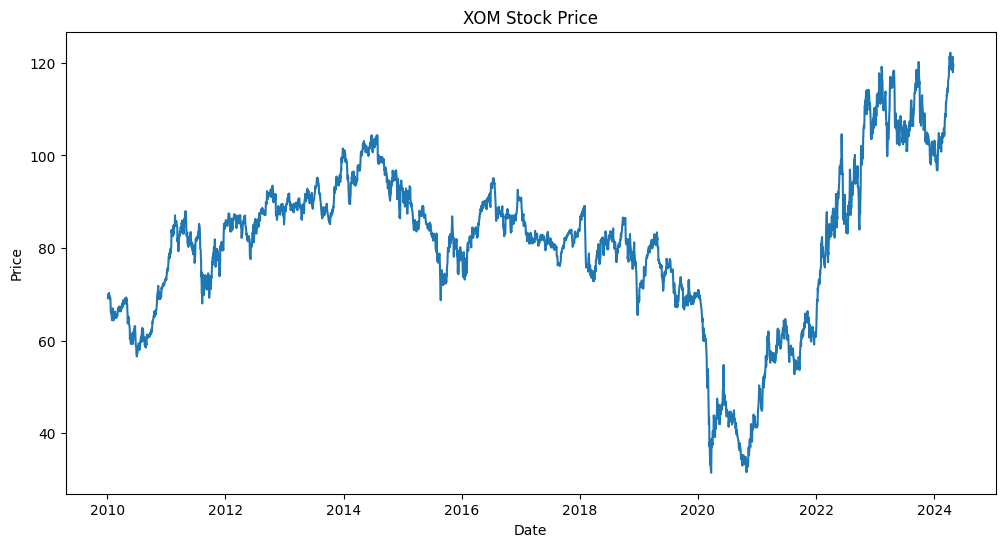

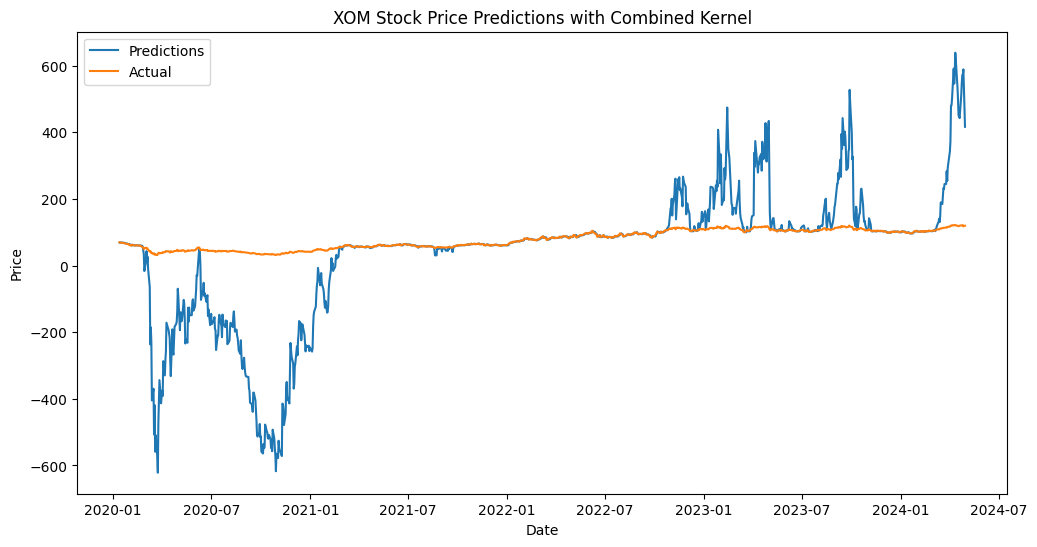

MSE with Combined Kernel: 32002.776401944968
MAPE with Combined Kernel: 1.9674726040936272


In [55]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, DotProduct
import numpy as np
import pandas as pd

# Download XOM stock price data
xom = yf.download('XOM', start='2010-01-01', end='2024-04-30')

# Plot XOM stock price
plt.figure(figsize=(12, 6))
plt.plot(xom['Close'])
plt.title('XOM Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Split data into training and testing sets
train_size = int(len(xom) * 0.7)
train_data = xom['Close'][:train_size]
test_data = xom['Close'][train_size:]

# Normalize the data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.values.reshape(-1, 1))

# Create X and y for training
X_train = train_data_normalized[:-1]
y_train = train_data_normalized[1:]

# Ensure the data is 2D
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Make predictions on the testing set
test_data_normalized = scaler.transform(test_data.values.reshape(-1, 1))

# For predictions, use previous day's price as input
X_test = test_data_normalized[:-1]
y_test = test_data_normalized[1:]

# Ensure the test data is 2D
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Define a combination of kernels
kernel = DotProduct(sigma_0=1.0) + 2 * ExpSineSquared(length_scale=1.0, periodicity=1.0) + RBF(length_scale=1.0)

# Create and fit the GP model
model = GaussianProcessRegressor(kernel=kernel)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test).reshape(-1, 1)

# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[1:], scaler.inverse_transform(predictions), label='Predictions')
plt.plot(test_data.index[1:], scaler.inverse_transform(y_test), label='Actual')
plt.title('XOM Stock Price Predictions with Combined Kernel')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), scaler.inverse_transform(predictions))

print("MSE with Combined Kernel:", mse)
print("MAPE with Combined Kernel:", mape)
